In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import pandas as pd
from utility.graph_utility import GraphUtility

# [[freq, logmag, phase], [freq, logmag, phse], ・・・]

In [3]:
# 1folder
folder = "20221014_152600_40dB_-0.1--0.15V_8.5-11.0"
filename = "20221014_152600_40dB_-0.1V.csv"
file_day = "20221014_152600_40dB_"
csvname = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder + "/" + filename

df = pd.read_csv(csvname, sep=',',header=None, usecols=[0,1,2,3,4,5])
all_freq = df.iloc[17:,1]
freq_start = all_freq.head(1)
freq_end = all_freq.tail(1)
print(all_freq, freq_start, freq_end)

# dB = 5
dB = float(df.iat[0, 5])
print(dB)
minV = float(df.iat[1,5])
maxV = float(df.iat[2,5])
numV = int(df.iat[3,5])
# maxV = 5.125
# numV = 6
v0 = np.linspace(minV, maxV, numV)

if v0[1] > 0:
    v = v0
else:
    v = np.flip(v0)

print(minV, maxV, v)


17       8.500000000
18       8.501250000
19       8.502500000
20       8.503750000
21       8.505000000
            ...     
2013    10.995000000
2014    10.996250000
2015    10.997500000
2016    10.998750000
2017    11.000000000
Name: 1, Length: 2001, dtype: object 17    8.500000000
Name: 1, dtype: object 2017    11.000000000
Name: 1, dtype: object
40.0
-0.1 -0.15 [-0.15       -0.14791667 -0.14583333 -0.14375    -0.14166667 -0.13958333
 -0.1375     -0.13541667 -0.13333333 -0.13125    -0.12916667 -0.12708333
 -0.125      -0.12291667 -0.12083333 -0.11875    -0.11666667 -0.11458333
 -0.1125     -0.11041667 -0.10833333 -0.10625    -0.10416667 -0.10208333
 -0.1       ]


In [4]:
phase = {}
# diff = {}
for m,n in enumerate(v):
    # print(m,n)
    filename = file_day + str(n) + "V.csv"
    csvname1 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder + "/" + filename
    
    phase[n] = np.loadtxt(csvname1, skiprows=17, usecols=[3], delimiter=',', unpack=True)


In [5]:
v_array = np.array(v)
print(v_array.dtype)
freq_array =  np.loadtxt(csvname, skiprows=17, usecols=[1], delimiter=',', unpack=True)
# freq_array = np.array(freq_array, dtype=float)
print(freq_array)

float64
[ 8.5      8.50125  8.5025  ... 10.9975  10.99875 11.     ]


[[ -22.45204    -22.13514    -22.61827   ...  -31.49961    -32.4009
   -35.98011  ]
 [ -22.43337    -22.31365    -22.66463   ...  -31.35579    -31.7923
   -35.83187  ]
 [ -21.72919    -22.1209     -22.23686   ...  -31.71018    -32.24701
   -35.76777  ]
 ...
 [   4.55761      0.2767701    0.4757456 ... -141.9432    -155.9526
  -173.0866   ]
 [   4.948502     1.026946     0.9558092 ... -143.0603    -157.5488
  -176.0593   ]
 [   5.754874     1.568969     1.503169  ... -145.4085    -157.9942
   169.5113   ]]


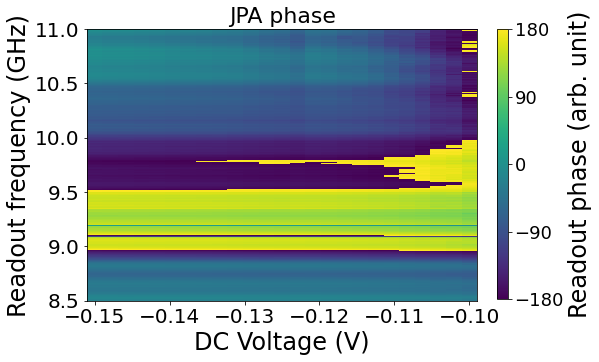

In [6]:
#　位相評価
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 20
x = v
y = freq_array


X, Y = np.meshgrid(x, y)
# print(X,Y)
Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
    # print(i)
    Z[i] = phase[x[i]]
    # print(Z[i])
Z_T = Z.transpose()
print(Z_T)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(X, Y, Z_T, shading="auto" , vmin=-180, vmax=180)
hoge00.set_clim(-180, 180)
cax = plt.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = plt.colorbar(hoge00, cax=cax, ticks=[-180, -90, 0, 90, 180])
# cbar = fig.colorbar(ticks=[-180, -90, 0, 90, 180])

ax.set_title("JPA phase", size=22)
ax.set_xlabel('DC Voltage (V)', size=24)
ax.set_ylabel('Readout frequency (GHz)', size=24)
cbar.set_label("Readout phase (arb. unit)", size=24) #カラーバーのラベル
plt.tick_params(labelsize=18)

plt.show()
del plt


In [7]:
diff = {}
for i,m in enumerate(v):
    diff[m] = abs(phase[v[i]] - phase[v[i-1]])
    # print(i)
    for l in range(len(diff[m])):
        # print((diff[i])[l])
        if (diff[m])[l] > 180:
            (diff[m])[l] = 360 - (diff[m])[l]
    diff[m] = diff[m]
    
print(diff)

{-0.15: array([ 13.52807 ,  13.3985  ,  14.03858 , ..., 177.64421 , 178.992198,
       163.756426]), -0.14791666666666667: array([0.3169   , 0.11972  , 0.39171  , ..., 4.2808399, 3.921556 ,
       4.185905 ]), -0.14583333333333331: array([0.48313  , 0.35098  , 0.11596  , ..., 0.1989755, 0.0711368,
       0.0658   ]), -0.14375: array([0.47686  , 0.12669  , 0.29949  , ..., 3.0959166, 2.8087702,
       2.637196 ]), -0.14166666666666666: array([0.51354 , 0.20488 , 0.01533 , ..., 2.519559, 2.571384, 2.640487]), -0.13958333333333334: array([0.22145 , 0.28329 , 0.49458 , ..., 4.86429 , 4.009815, 5.257325]), -0.1375: array([0.16008 , 0.28416 , 0.01274 , ..., 2.3511  , 3.04222 , 2.492621]), -0.13541666666666666: array([0.27052, 0.63818, 0.12574, ..., 4.14981, 4.79017, 3.01874]), -0.13333333333333333: array([0.1794 , 0.23136, 0.4443 , ..., 4.48759, 4.0527 , 5.10064]), -0.13125: array([0.79243, 0.31444, 0.66396, ..., 0.14305, 0.20765, 1.05153]), -0.12916666666666665: array([ 0.41631,  0.69307,  0

(2001, 25) (2001, 25)
(2001, 25)


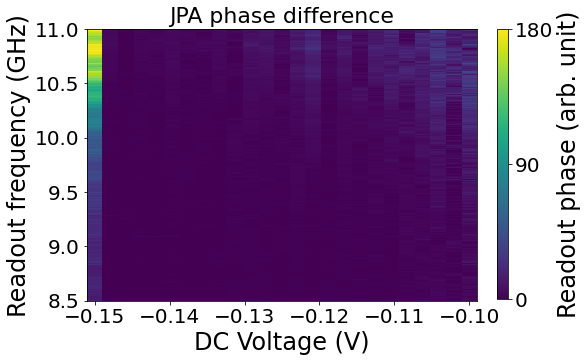

In [9]:
# 差分評価
import matplotlib.pyplot as plt
from numpy import size
plt.rcParams["font.size"] = 20
x = v
y = freq_array


X, Y = np.meshgrid(x, y)
print(X.shape,Y.shape)
Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
    Z[i] = diff[x[i]]
Z_T = Z.transpose()
print(Z_T.shape)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(X, Y, Z_T,shading="auto")
hoge00.set_clim(0, 180)
cax = plt.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = plt.colorbar(hoge00, cax=cax, ticks=[0, 90, 180])
# cbar = plt.colorbar(hoge00, cax=cax, ticks=[-180, -90, 0, 90, 180])
# cbar = fig.colorbar(ticks=[-180, -90, 0, 90, 180])

ax.set_title("JPA phase difference", size=22)
ax.set_xlabel('DC Voltage (V)', size = 24)
ax.set_ylabel('Readout frequency (GHz)', size = 24)
cbar.set_label("Readout phase (arb. unit)", size = 24) #カラーバーのラベル


plt.show()
del plt
